# Projects -Optimizing Retail Banking Strategies Through RFM-Based Customer Segmentation

## 02 – Exploratory Data Analysis: Customer Profiles

In this step, we explore the **demographic and geographic characteristics** of customers to better understand the dataset before segmentation.

### 🧾 Objectives
- Analyze the **age distribution** of customers
- Explore **gender proportions**
- Examine **customer location distribution**
- Observe **transaction trends per customer profile**

### 📌 Key Columns Used
- `age`
- `CustGender`
- `CustLocation`
- `TransactionDate`

---

#### 🔍 1. Age Distribution

We’ll start by visualizing how customer ages are distributed to detect anomalies, outliers, and identify key age groups.

#### 🔍 2. Gender Breakdown

Understand the gender representation in the customer base.

#### 🔍 3. Customer Location Distribution

Review the number of customers per region or city to identify concentrations.

#### 🔍 4. Transaction Trends by Profile

Observe how different age groups, genders, and locations relate to transaction behavior.


**Import Libraries**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [60]:
df = pd.read_csv('dataset/bank_data_C_cleaned.csv')

In [62]:
df.head()

,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


In [64]:
# Explore number of customer we have and compare it with the total of transactions we have
df['CustomerID'].nunique()

878763

In [66]:
df.shape

(1040794, 11)

**1. Age Distribution**

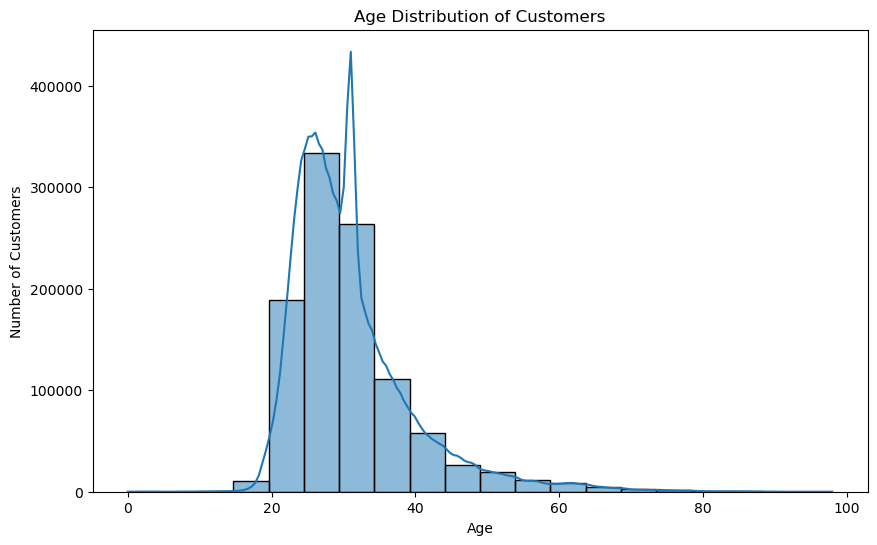

In [68]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins = 20, kde = True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

**2. Gender**

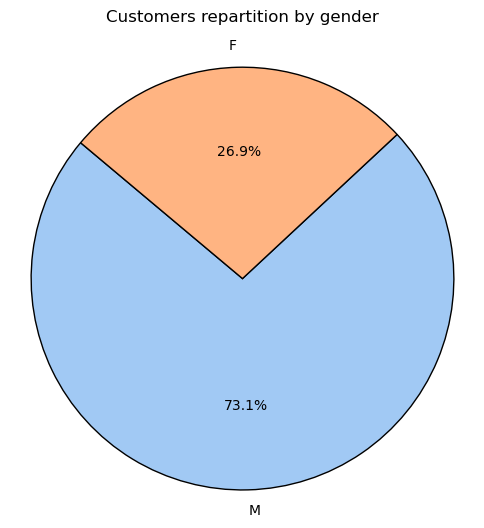

In [131]:
# Obtenir la distribution
gender_counts = df['CustGender'].value_counts()

# Définir une palette de couleurs inspirée de Seaborn
colors = sns.color_palette('pastel')[0:len(gender_counts)]

# Tracer le diagramme de secteur
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Customers repartition by gender\n')
plt.axis('equal')  # Pour un cercle parfait
plt.show()

In [72]:
# Percentage breakdown
gender_percent = df['CustGender'].value_counts(normalize=True) * 100
print("Gender Percentage:\n", gender_percent.round(2))

Gender Percentage:
 CustGender
M    73.05
F    26.95
Name: proportion, dtype: float64


**3. Customers Location Distribution**

/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_9963/1431617844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis', legend=False)


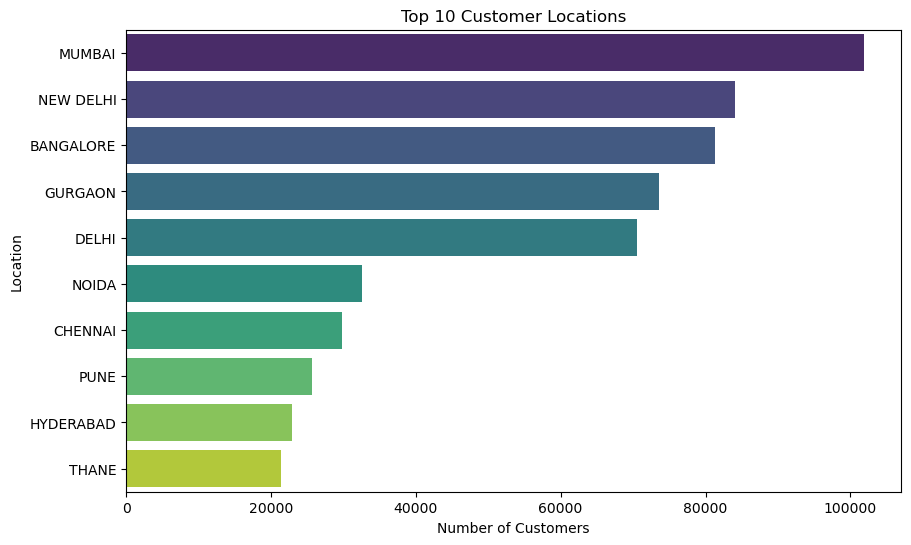

In [74]:
top_locations = df['CustLocation'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis', legend=False)
plt.title('Top 10 Customer Locations')
plt.xlabel('Number of Customers')
plt.ylabel('Location')
plt.show()

In [76]:
df.head()

,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


**4. Transaction Trends by Profile**

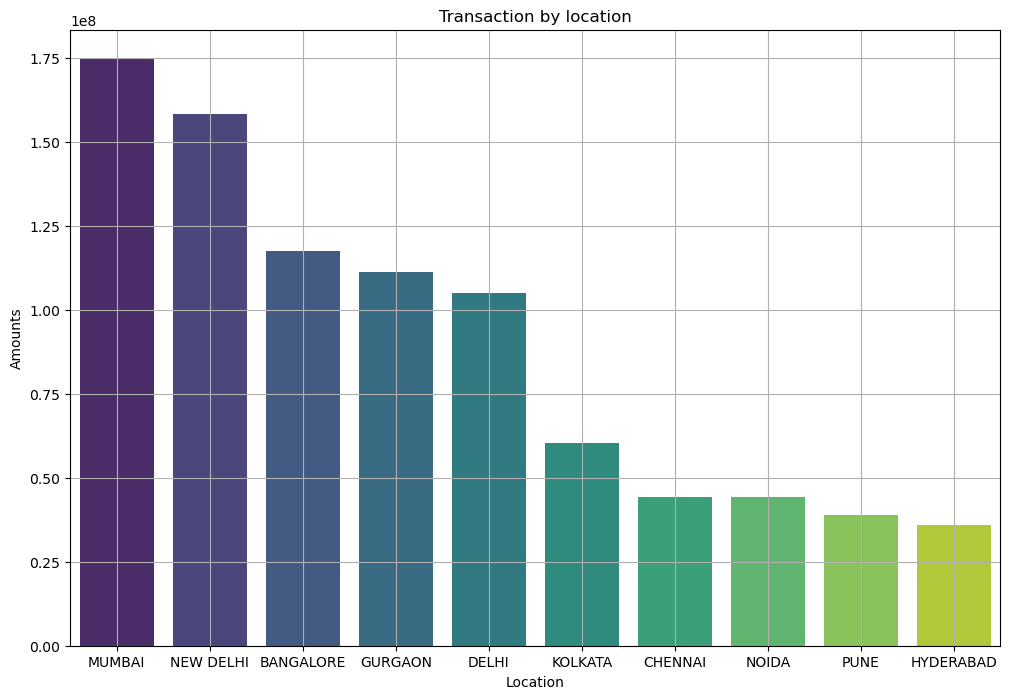

In [78]:
# 4a. Transactions by Location
Transaction_by_location = df.groupby('CustLocation')['TransactionAmount (INR)'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(data = Transaction_by_location.head(10), x = 'CustLocation', y = 'TransactionAmount (INR)', palette='viridis', hue='CustLocation', legend=False)
plt.title('Transaction by location')
plt.xlabel('Location')
plt.ylabel('Amounts')
plt.grid()
plt.show()

/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_9963/748896811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='TransactionAmount (INR)', palette='Set2')


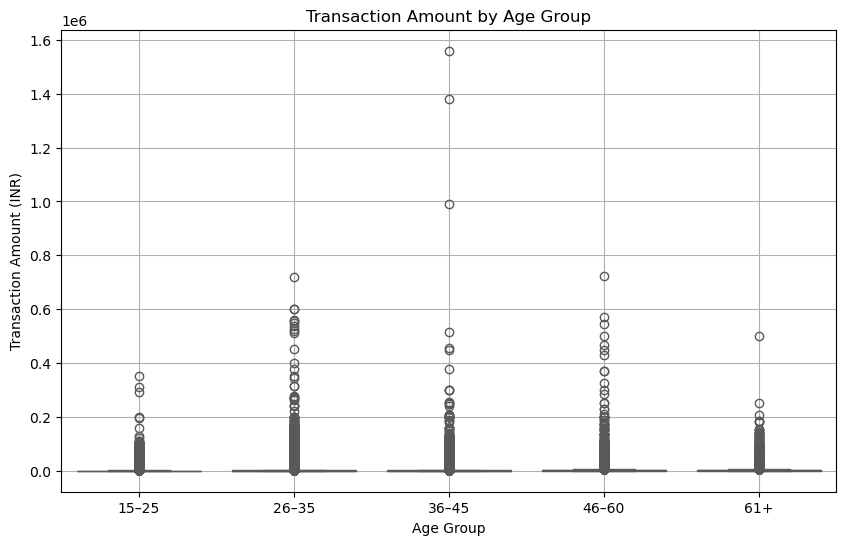

In [80]:
# Transactions by Age Group
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[15, 25, 35, 45, 60, 100], labels=['15–25', '26–35', '36–45', '46–60', '61+'])

# Plot transaction amount by age group
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='TransactionAmount (INR)', palette='Set2')
plt.title('Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transaction Amount (INR)')
plt.grid(True)
plt.show()

/var/folders/gt/5gl4sh3x46g22_mfwmdtqdfw0000gn/T/ipykernel_9963/3196404934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tx_by_gender, x='CustGender', y='Transaction Count', palette='pastel')


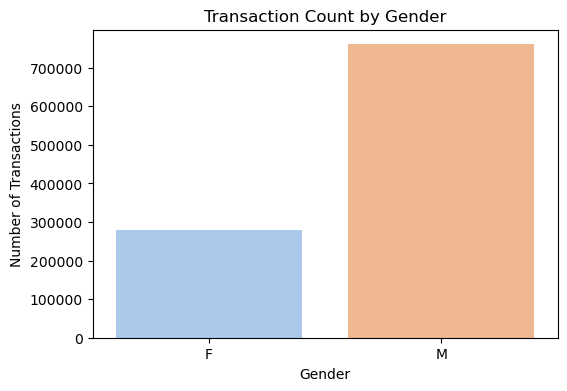

In [82]:
# Transaction Frequency by Gender
tx_by_gender = df.groupby('CustGender')['TransactionID'].count().reset_index().rename(columns={'TransactionID': 'Transaction Count'})

plt.figure(figsize=(6, 4))
sns.barplot(data=tx_by_gender, x='CustGender', y='Transaction Count', palette='pastel')
plt.title('Transaction Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

**Unique transaction date distribution**

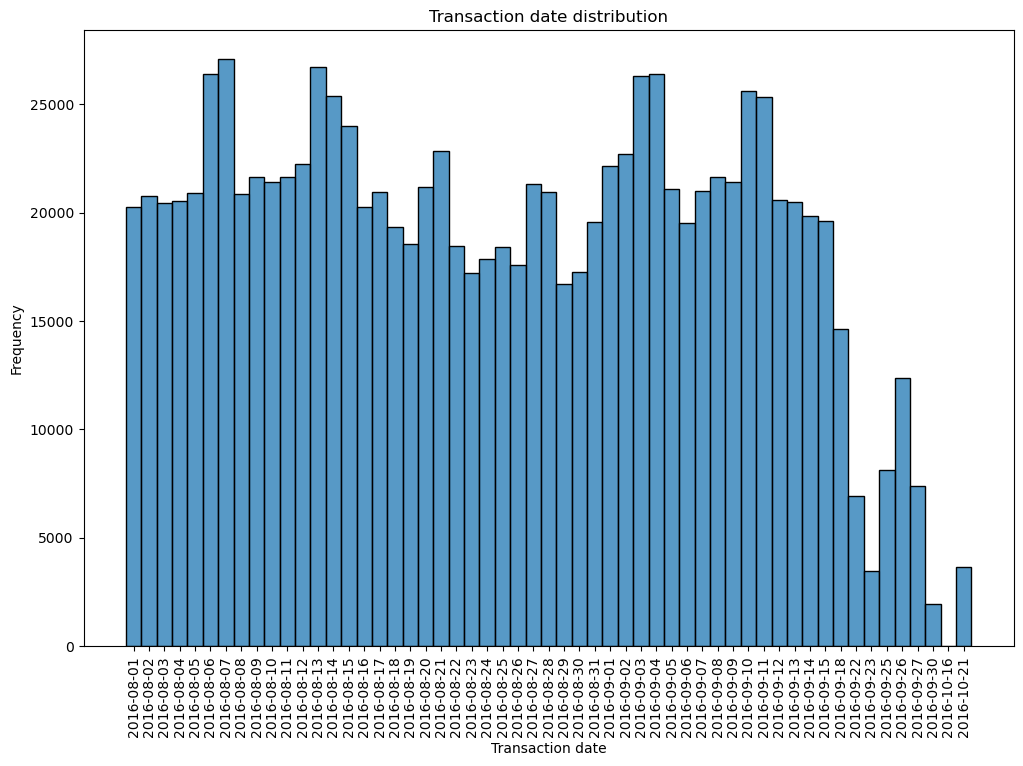

In [123]:
plt.figure(figsize=(12,8))
sns.histplot(df['TransactionDate'].sort_values(ascending=True), bins = 12, kde = False)
plt.title('Transaction date distribution')
plt.xlabel('Transaction date')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [90]:
df.head()

,Unnamed: 0,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,age_group
0,0,T1,C5841053,1994-01-10 00:00:00.000000000,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22,15–25
1,1,T2,C2142763,1957-04-04 00:00:00.000000000,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59,46–60
2,2,T3,C4417068,1996-11-26 00:00:00.000000000,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20,15–25
3,3,T4,C5342380,1973-09-14 00:00:00.000000000,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43,36–45
4,4,T5,C9031234,1988-03-24 00:00:00.000000000,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28,26–35


In [86]:
df.to_csv('dataset/bank_data_C_cleanedv2.csv')